# EDA analysis on lending club case study
#### Irshad Ahamed
##### Objective : The goal of this case study is to identify factors that indicate loan default through exploratory data analysis (EDA). By understanding these variables, the company can minimize risky loans and reduce credit loss. (Corresponding data set -  loan.csv).

#### Note : 
We have selected 'countplot' as major plot for univariate and bivariate analysis. 
However we also explored the data using different plots like 
- boxplot,
- lineplot,
- heat map,
- histogram,
- scatterplot etc
towards end of univariate and bivariate analysis.  
This helped us maintain the flow in our analysis.

In [14]:
# Import libraries, turn off warning and set max column and row display settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)


In [15]:
# Read csv file in dataframe
loan_df = pd.read_csv("loan.csv")
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
# data set initial analysis
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [24]:
#Raw datafile shape before cleaning
loan_df.shape

(39717, 111)

In [18]:
# Check null values in dataset and apply filter to select only columns with missing values
missing_values = 100*loan_df.isnull().mean().sort_values(ascending = False)
missing_values[missing_values>0]

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [26]:
#Drop column having missing values more than 30% as these will not be useful for analysis
missing_percentage = loan_df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 30].index
loan_df = loan_df.drop(columns=columns_to_drop)
loan_df.shape

(39717, 53)

After analysis of database, we noticed that there are few columns which are not required for analysis.   
(This step can be skipped, but we are doing it to have better version of cleaned database)
- `URL` = May not provide any insights as url is not important criteria in loan database.  
- `member_id` -id and member id are unique entries for each row. Not much analysis can be done on these.  
- `title`  -  Duplicated information. We can use 'Purpose'.  
- `tax_liens`  -  Single value column.  
- `zip_code`  -  Duplicated information. We can use 'State'.  
- `pymnt_plan`  -  Single value column.  
- `application_type`  -  Single value column.  
- `policy_code`  -  RSingle value column.  
- `delinq_amnt`  -  Single value column.  
- `chargeoff_within_12_mths`  - Single value column.  
- `acc_now_delinq`  - Single value column.  
- `collections_12_mths_ex_med`  -  Single value column.  
- `initial_list_status`  -  Single value column.  

In [23]:
# Refer above comment
loan_df.drop(columns = ['url','emp_title', 'id', 'zip_code','url','member_id','title','tax_liens', 'title','pymnt_plan', 'delinq_amnt','application_type', 'policy_code','chargeoff_within_12_mths','acc_now_delinq','initial_list_status','collections_12_mths_ex_med'], inplace=True)
loan_df.shape

KeyError: "['url', 'emp_title', 'id', 'zip_code', 'url', 'member_id', 'title', 'tax_liens', 'title', 'pymnt_plan', 'delinq_amnt', 'application_type', 'policy_code', 'chargeoff_within_12_mths', 'acc_now_delinq', 'initial_list_status', 'collections_12_mths_ex_med'] not found in axis"

Data cleaning Note - In practical scenarios, the null values can not be assumed. Same needs to fixed/removed in consultation with client.However, this being study material, we are fixing the null values using median/mode method.

In [28]:
#Identify type of columns to impute null values
columns_not_null = loan_df.isnull().mean() * 100
columns_to_clean = columns_not_null[columns_not_null > 0].index
loan_df[columns_to_clean].dtypes

emp_title                      object
emp_length                     object
title                          object
revol_util                     object
last_pymnt_d                   object
last_credit_pull_d             object
collections_12_mths_ex_med    float64
chargeoff_within_12_mths      float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object

In [30]:
#fix object type columns using mode method
loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0],inplace=True)
loan_df["revol_util"].fillna(loan_df["revol_util"].mode()[0],inplace=True)
loan_df["last_pymnt_d"].fillna(loan_df["last_pymnt_d"].mode()[0],inplace=True)
loan_df["last_credit_pull_d"].fillna(loan_df["last_credit_pull_d"].mode()[0],inplace=True)

In [32]:
#fix object type columns using median method
loan_df["pub_rec_bankruptcies"].fillna(loan_df["pub_rec_bankruptcies"].median(),inplace=True)

In [34]:
100*loan_df.isnull().mean().sort_values(ascending = False)

emp_title                     6.191303
chargeoff_within_12_mths      0.140998
collections_12_mths_ex_med    0.140998
tax_liens                     0.098195
title                         0.027696
total_rec_late_fee            0.000000
revol_util                    0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
collection_recovery_fee       0.000000
recoveries                    0.000000
pub_rec                       0.000000
last_pymnt_d                  0.000000
last_pymnt_amnt               0.000000
last_credit_pull_d            0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
delinq_amnt                   0.000000
pub_rec_bankruptcies     

In [36]:
# Export the cleaned database in another csv for future reference
loan_df.to_csv('loan_df_cleaned.csv', index=False)

In [80]:
#Dataset after data cleaning
loan_df.shape

(39717, 38)

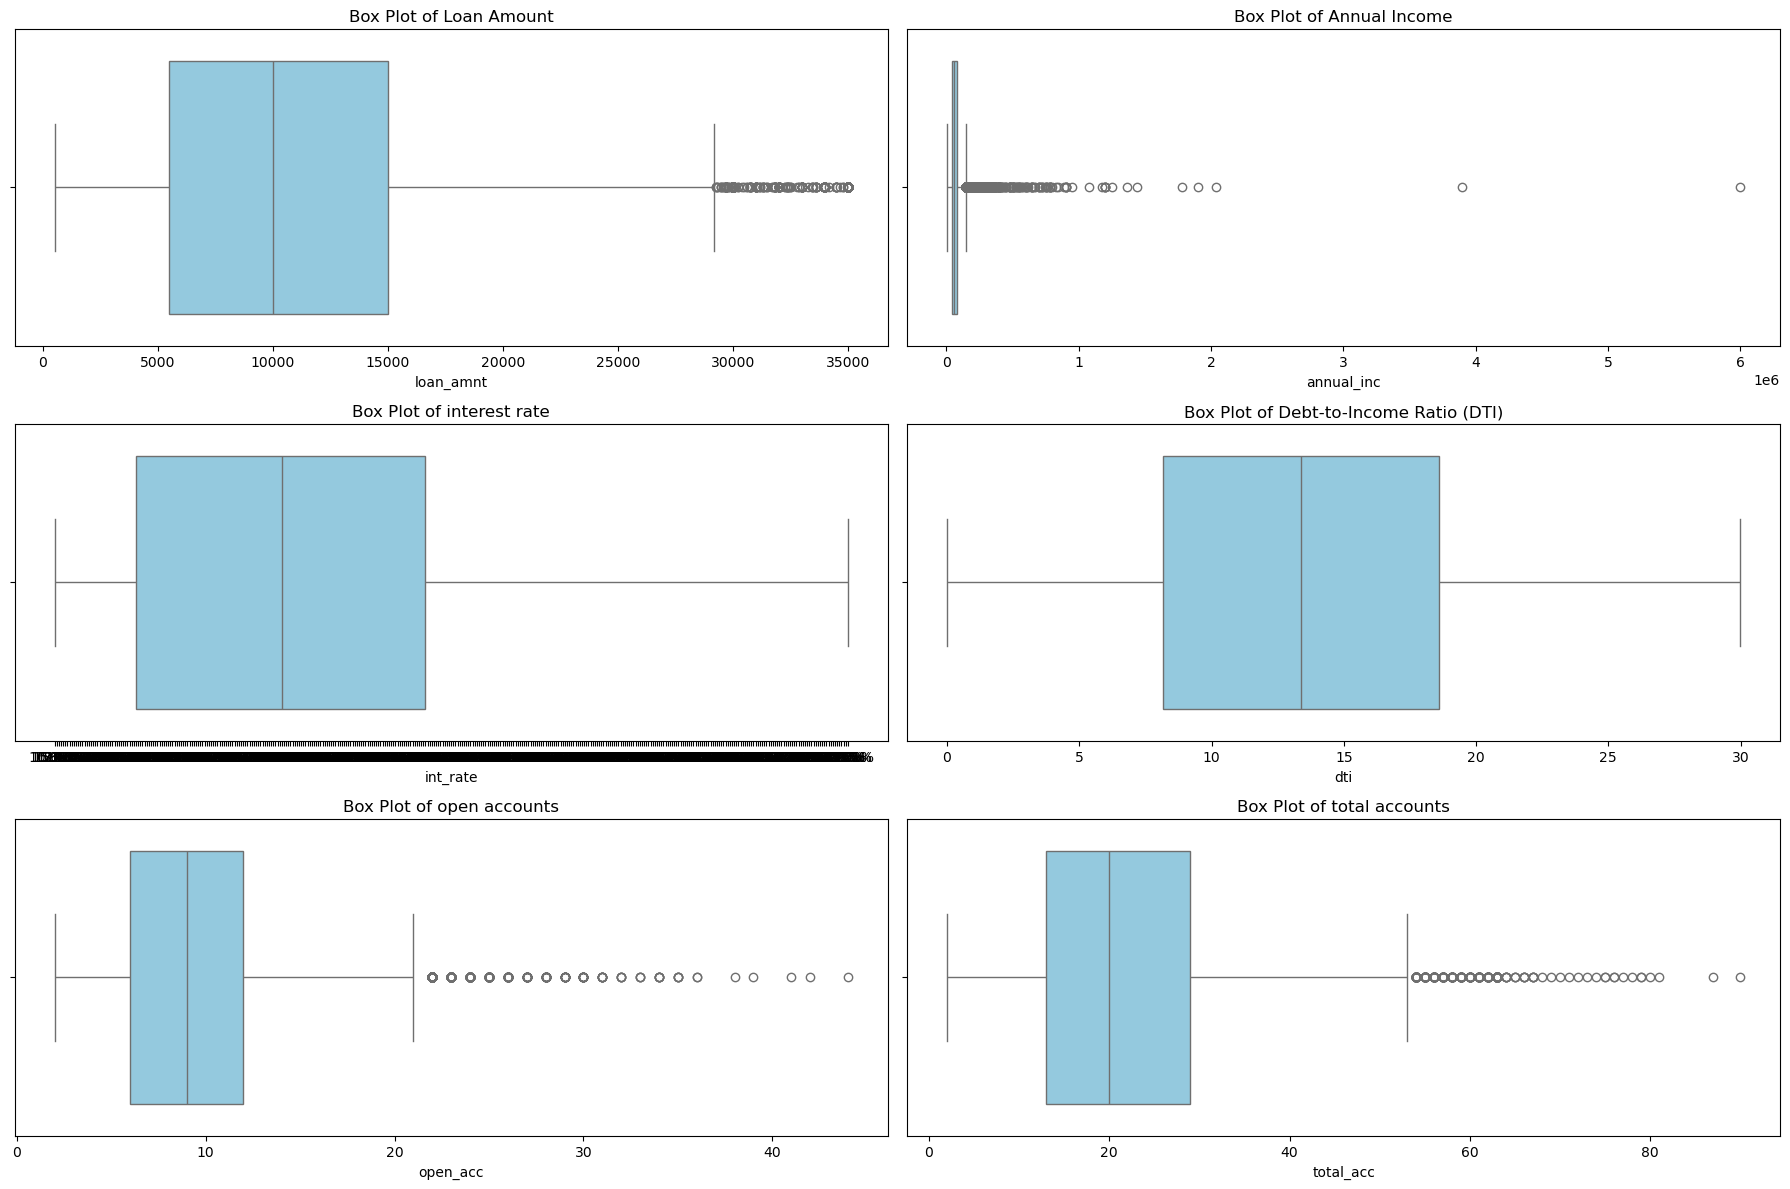

In [40]:
# Check for outliers and create a separate dataframe free of outliers. Plot boxplots for various numerical columns to check outliers. (Boxplot in subplot)
plt.figure(figsize=(18, 12))


plt.subplot(3, 2, 1)
sns.boxplot(x=loan_df['loan_amnt'], color='skyblue')
plt.title('Box Plot of Loan Amount')


plt.subplot(3, 2, 2)
sns.boxplot(x=loan_df['annual_inc'], color='skyblue')
plt.title('Box Plot of Annual Income')


plt.subplot(3, 2, 3)
sns.boxplot(x=loan_df['int_rate'], color='skyblue')
plt.title('Box Plot of interest rate')


plt.subplot(3, 2, 4)
sns.boxplot(x=loan_df['dti'], color='skyblue')
plt.title('Box Plot of Debt-to-Income Ratio (DTI)')


plt.subplot(3, 2, 5)
sns.boxplot(x=loan_df['open_acc'], color='skyblue')
plt.title('Box Plot of open accounts')


plt.subplot(3, 2, 6)
sns.boxplot(x=loan_df['total_acc'], color='skyblue')
plt.title('Box Plot of total accounts')


# Adjusting layout
plt.tight_layout()
plt.show()

In [40]:
#Create separate dataframe outlier free. Here for each column, we are removing data more than 80-95 percentile. 
#Values are selected looking at boxplot.
condition = (loan_df['loan_amnt'] < 30000) & (loan_df['annual_inc'] < 100000) & (loan_df['open_acc'] < 20) & (loan_df['total_acc'] < 50)
loan_df_no_outlier = loan_df.loc[condition]
loan_df_no_outlier.shape

(31886, 53)

# Univariate and Bivariate analysis

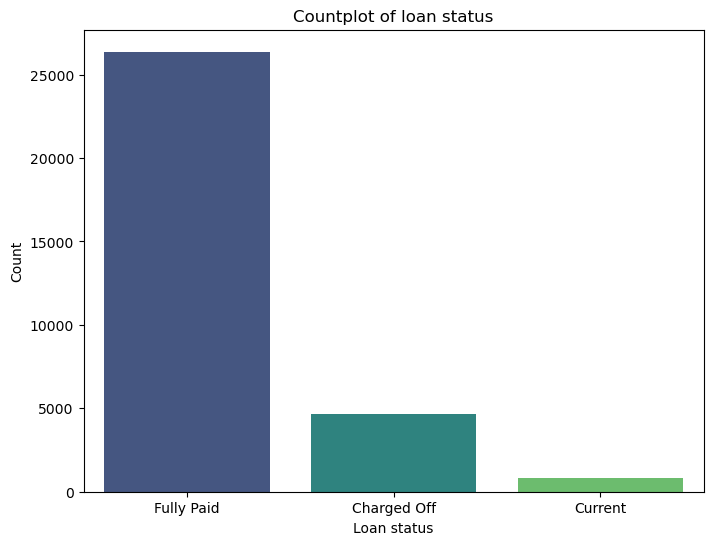

In [47]:
# Univariate analysis for loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=loan_df_no_outlier, palette='viridis')
plt.title('Countplot of loan status')
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.show()

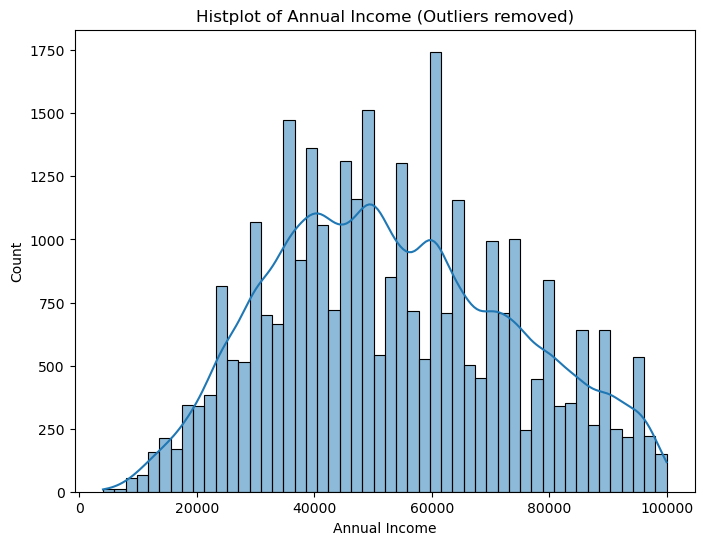

In [60]:
# Univariate analysis for annual income (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(x='annual_inc', data=loan_df_no_outlier, kde = True)
plt.title('Histplot of Annual Income (Outliers removed)')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

#### Observation
Distribution: The distribution of annual income appears right-skewed. There are more people applying for loan having lower income than higher income.

Median and Quartiles: The median income (represented by the line inside the box) is around 50,000. The first quartile (Q1) is below 30,000, and the third quartile (Q3) is above 70,000. This indicates that the middle 50% of individuals have incomes between 30,000 and 70,000.

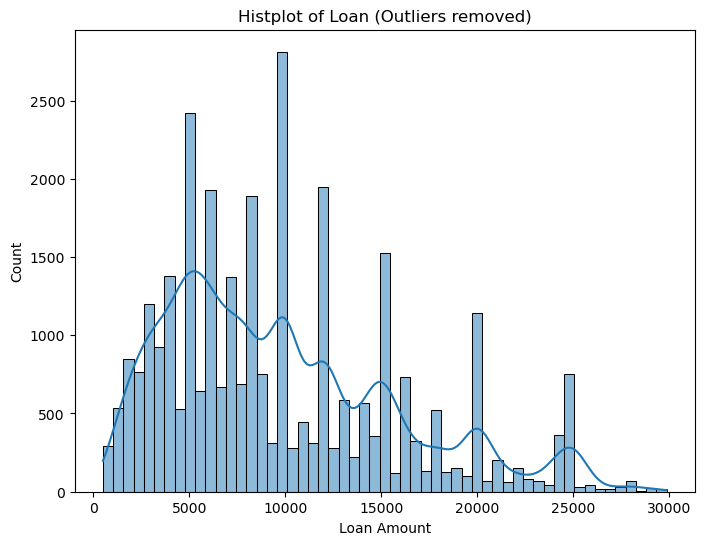

In [62]:
# Univariate analysis for loan amount (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(x='loan_amnt', data=loan_df_no_outlier, kde = True)
plt.title('Histplot of Loan (Outliers removed)')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

#### Observation  
The histogram shows a right-skewed distribution, indicating that there are a few loans with very high amounts, while most loans are relatively smaller.
The peak of the distribution is between 5,000 and 10,000, indicating that the majority of loans fall within 5k-10k range.

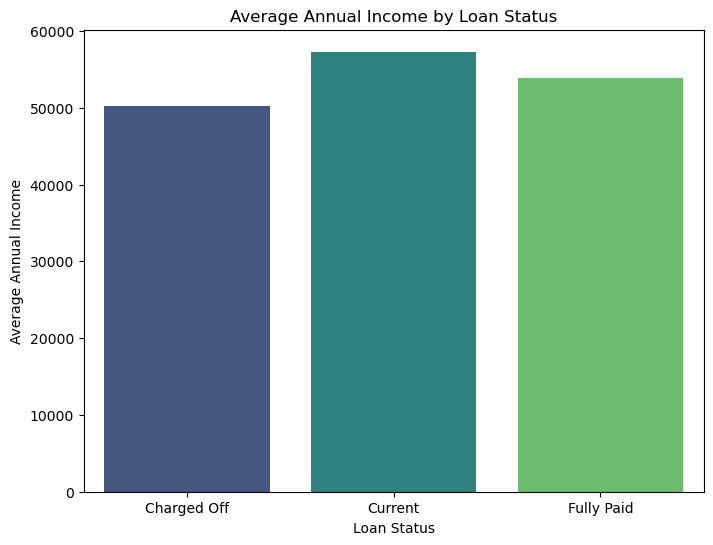

In [88]:
# Bivariate analysis between annual income over loan status (countplot)
mean_income_by_status = loan_df_no_outlier.groupby('loan_status')['annual_inc'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_status', y='annual_inc', data=mean_income_by_status, palette='viridis')
plt.title('Average Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
plt.show()

#### Observation
Individuals with loans that are "Charged Off" (meaning they defaulted) have the lowest average annual income compared to other loan status. However the difference is not major.
This indicates that 'Annual income' criteria is not a deciding factor and hence can not be used to decide loan repayment possibility for a client.


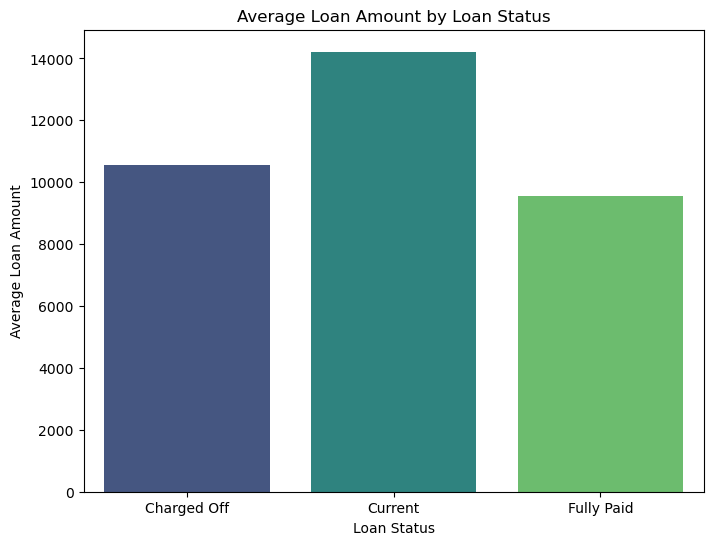

In [91]:
# Bivariate analysis between loan amount and loan status (countplot)
mean_income_by_la = loan_df_no_outlier.groupby('loan_status')['loan_amnt'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_status', y='loan_amnt', data=mean_income_by_la, palette='viridis')
plt.title('Average Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

#### Observation
The graph indicates that loan amount for 'Current' loan status is highest followed by 'Charged off' and 'Fully paid' respectively.
Lenders might need to exercise more caution when granting larger loans, as they seem to be more likely to be defaulted on. However it is not only the deciding criteria.

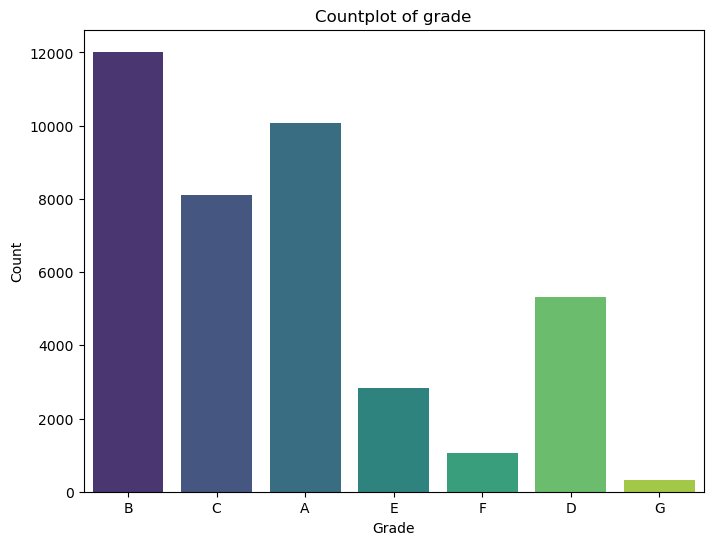

In [101]:
# Univariate analysis for grade column on entire dataframe (countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=loan_df, palette='viridis')
plt.title('Countplot of grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

#### Observation  
Most of the loans are granted for B, A and C which are higher grades(low risk profiles). The counplot shows that majority customers who apply for loan fall under 'B' category. Grades having lower grade like D, E, F and G have less number of loans granted. These grades indicate high risk profiles.

In [108]:
#Create a separate dataframe for 'Charged Off' and 'Fully paid' category for selective analysis wherever needed.
df_charged_off = loan_df_no_outlier[loan_df['loan_status'] == 'Charged Off'] # Charged off 
df_fully_paid = loan_df_no_outlier[loan_df['loan_status'] == 'Fully Paid'] # Fully paid
df_co_fp = loan_df_no_outlier[loan_df_no_outlier['loan_status'] != 'Current'] # Including both Charged Off and Fully Paid

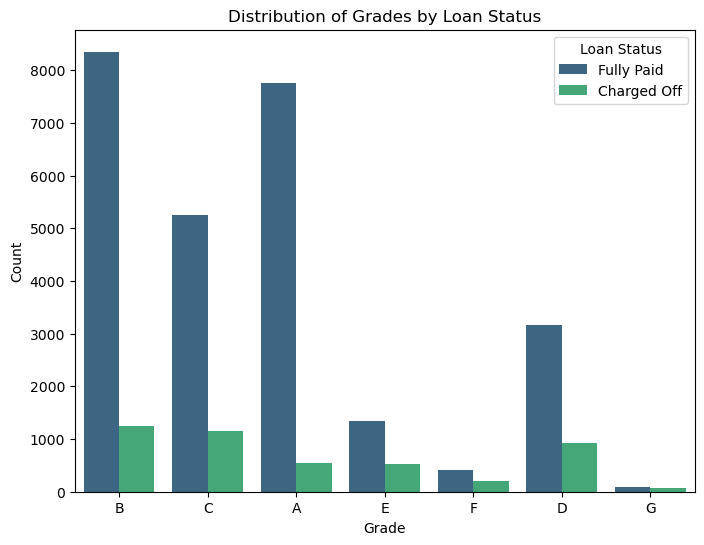

In [111]:
# Bivariate analysis between grade and loan status (countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='loan_status', data=df_co_fp, palette='viridis')
plt.title('Distribution of Grades by Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Obervation
By looking at difference between 'Charged Off' and 'Fully Paid' status for each grade, we can say that,
Fully Paid loans are more likely to be in higher-grade categories (A, B, C), while Charged Off loans are more likely to be in lower-grade categories (D, E, F, G)
Loan Risk: Loans with lower grades (D, E, F, G) are more likely to be charged off, indicating a higher risk of default.

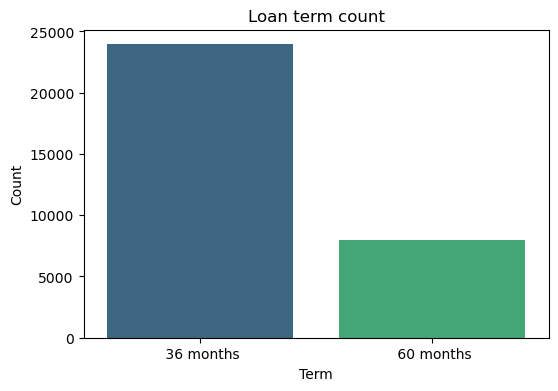

In [113]:
# Univariate analysis on column 'term' (countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x='term', data=loan_df_no_outlier, palette='viridis')
plt.title('Loan term count')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

#### Observation
Looking at counplot for loan term, we can derive that more loans are taken for 36 month duration than 60 month duration.

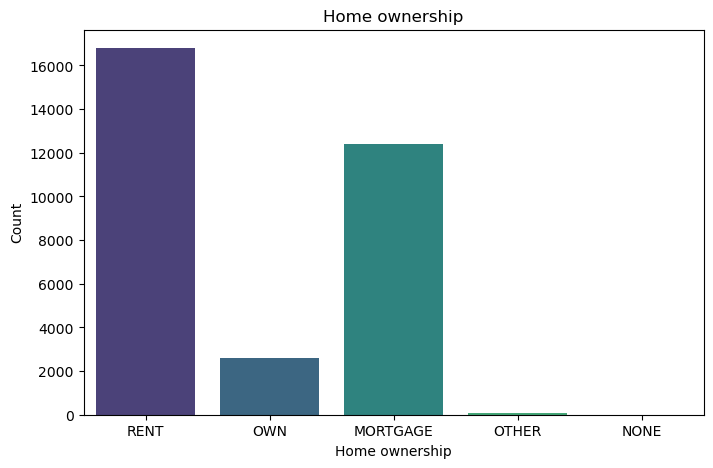

In [119]:
# Univariate analysis on column home_ownership (countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='home_ownership', data=loan_df_no_outlier, palette='viridis')
plt.title('Home ownership')
plt.xlabel('Home ownership')
plt.ylabel('Count')
plt.show()

#### Observation
"RENT" is the most common home ownership status, with a significantly higher count compared to the other categories. This also indicates that most of the loan applicants have debt (either rent or mortgage).

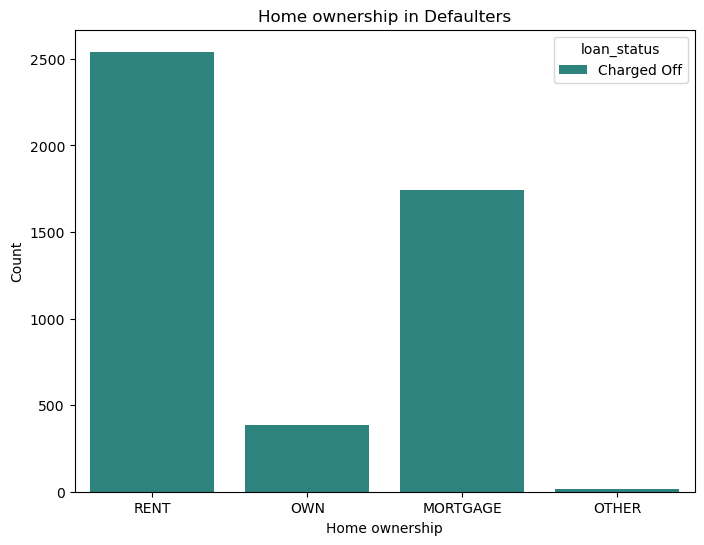

In [121]:
# Bivariate analysis between home_ownership and loan_status on Charged off dataframe (countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_charged_off, palette='viridis')
plt.title('Home ownership in Defaulters')
plt.xlabel('Home ownership')
plt.ylabel('Count')
plt.show()

#### Observation  
The "RENT" category has the highest number of defaults, followed by Mortgage and Own. "OWN" categories have less number of defaulters indicating it may be a safe option to lend loan to clients owning home.

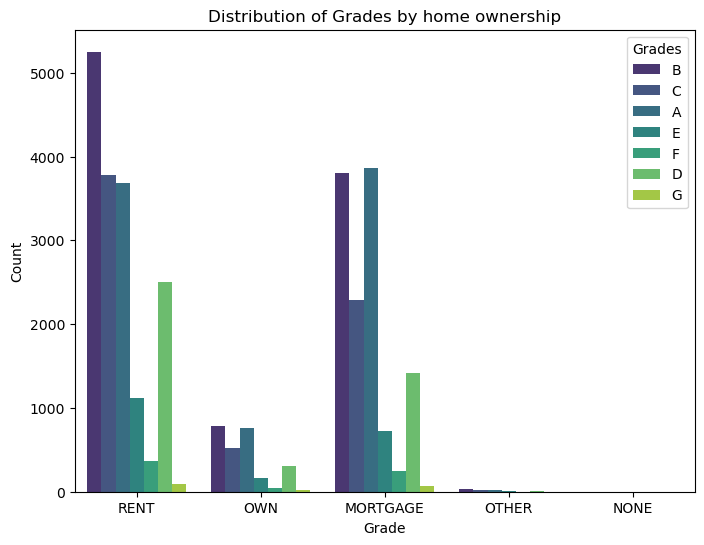

In [127]:
# Bivariate analysis between home_ownership and grades (countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='grade', data=loan_df_no_outlier, palette='viridis')
plt.title('Distribution of Grades by home ownership')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Grades')
plt.show()

#### Observation
Loans for individuals who own their homes outright are more likely to be in higher-grade categories (A, B, C).
For above countplots we can derive that, when home ownership is of 'own' category, chances of defalting loan are less.

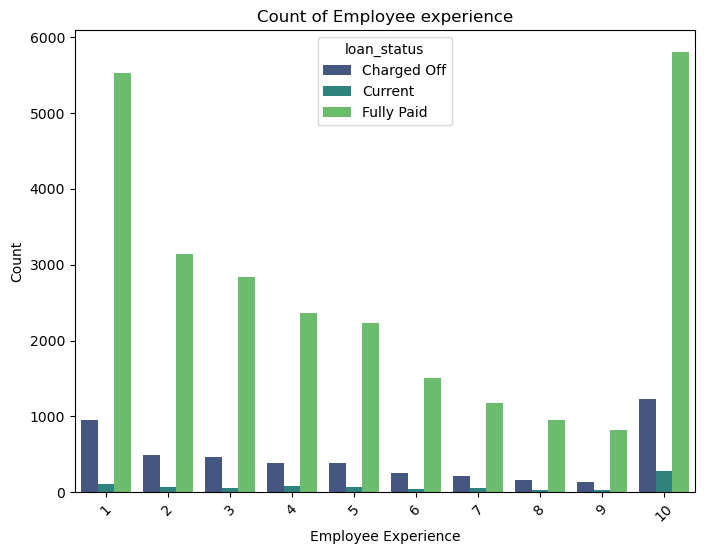

In [129]:
# Bivariate analysis on employee experience (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_df_no_outlier, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Employee experience')
plt.xlabel('Employee Experience')
plt.ylabel('Count')
plt.show()

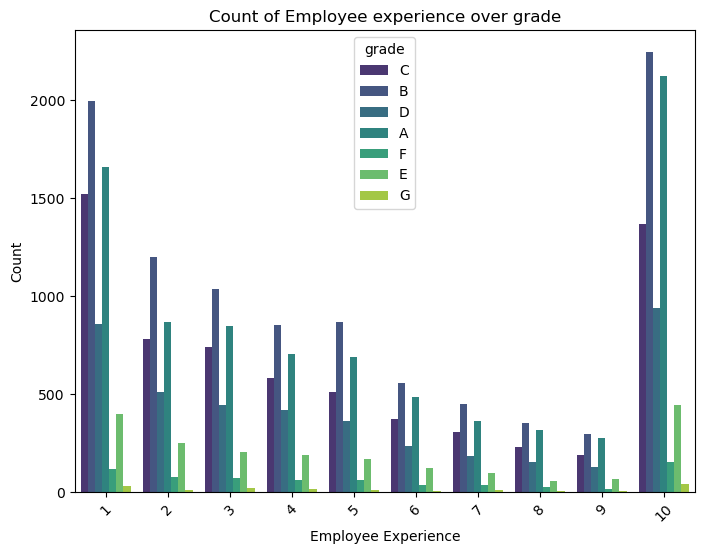

In [136]:
# Bivariate analysis on employee experience (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='emp_length', hue='grade', data=loan_df_no_outlier, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Employee experience over grade')
plt.xlabel('Employee Experience')
plt.ylabel('Count')
plt.show()

# Observation
Most of loan applicants have either experience more than 10+ years followed by <=1 year
The highest concentration of high-risk grades is found among employees with less than or equal to 1 year of experience, suggesting a potential correlation between new hires and higher-risk classifications.  
As experience increases, the proportion of high-risk grades generally decreases, indicating a possible correlation between tenure and lower-risk assessments.

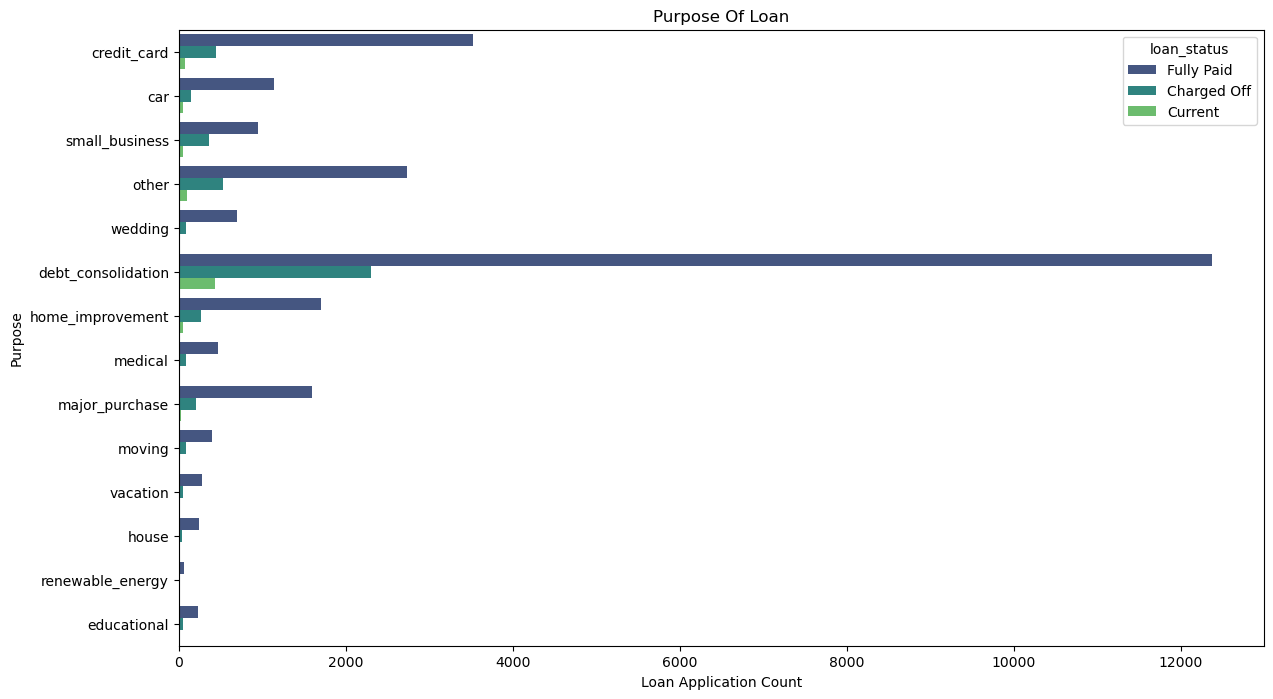

In [134]:
#Bivariate analysis of loan purpose and loan status (countplot)
plt.figure(figsize=(14,8))
sns.countplot(y="purpose",data=loan_df_no_outlier,hue='loan_status',palette='viridis')
plt.title('Purpose Of Loan')
plt.ylabel('Purpose')
plt.xlabel('Loan Application Count')      
plt.show()

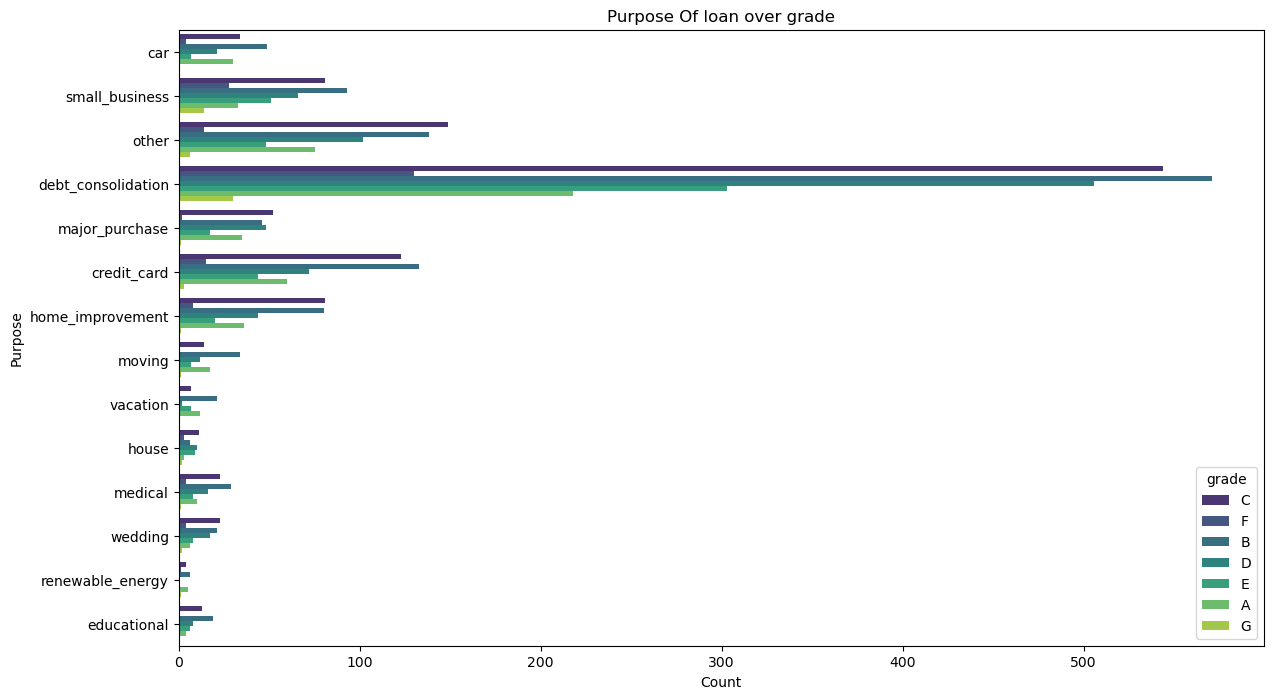

In [138]:
#Bivariate analysis of loan purpose and grade on only charged off data (Countplot)
plt.figure(figsize=(14,8))
sns.countplot(y="purpose",data=df_charged_off,hue='grade',palette='viridis')
plt.title('Purpose Of loan over grade')
plt.ylabel('Purpose')
plt.xlabel('Count')      
plt.show()

#### Observation  
Loans for debt consolidation have the highest concentration of high-risk grades (B, C, A, E), suggesting that individuals struggling to manage existing debt might be more likely to require higher-risk loans. Loans for credit card debt also show a significant number of high-risk grades, indicating a potential connection between credit card debt and financial difficulties.

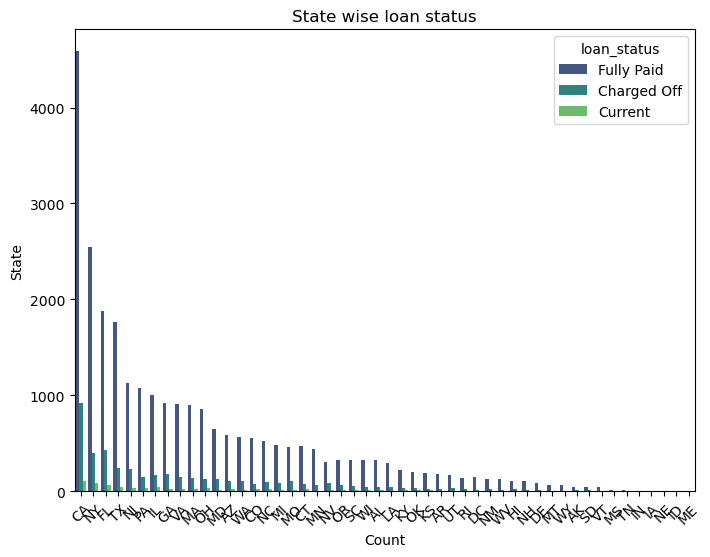

In [143]:
#Bivariate analysis between states and loan status (Countplot)
plt.figure(figsize=(8, 6))
sorted_loan_df = loan_df_no_outlier['addr_state'].value_counts().sort_values(ascending=False).index
sns.countplot(x='addr_state', data=loan_df_no_outlier, order=sorted_loan_df,hue='loan_status', palette='viridis')
plt.xticks(rotation=45)
plt.title('State wise loan status')
plt.ylabel('State')
plt.xlabel('Count') 
plt.show()

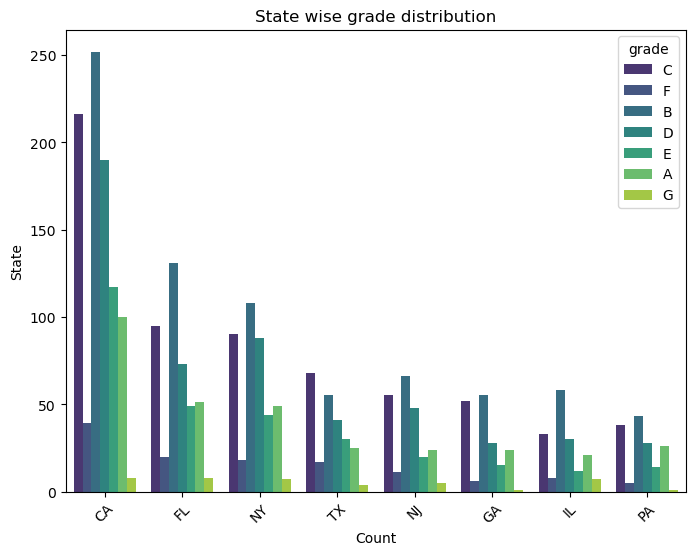

In [155]:
#  Bivariate analysis between states and grade (We selected top 8 stated for further analysis). (Countplot)
plt.figure(figsize=(8, 6))
df_sel_state = df_charged_off[df_charged_off['addr_state'].isin(['CA', 'NY', 'FL', 'TX', 'NJ','PA','IL','GA'])]
sorted_df_sel = df_sel_state['addr_state'].value_counts().sort_values(ascending=False).index
sns.countplot(x='addr_state', data=df_sel_state, order=sorted_df_sel, hue='grade',palette='viridis')
plt.xticks(rotation=45)
plt.title('State wise grade distribution')
plt.ylabel('State')
plt.xlabel('Count') 
plt.show()

#### Observation  
Most of the loans are applied from 'CA' (California) state almost more than 17% , followed by Florida, New york etc.

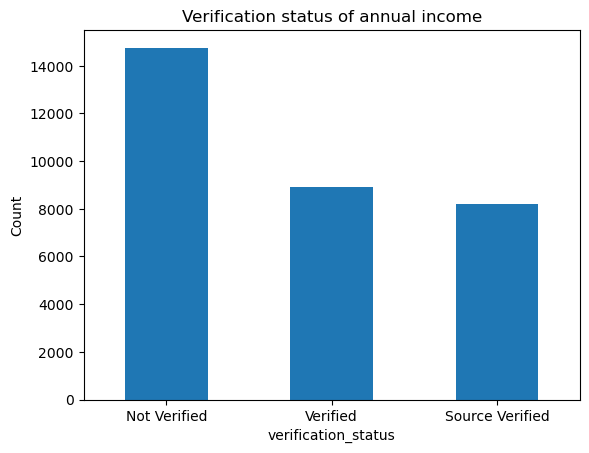

In [216]:
#Univariate analysis on verification status (barplot)
loan_df_no_outlier['verification_status'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Verification status of annual income')
plt.show()

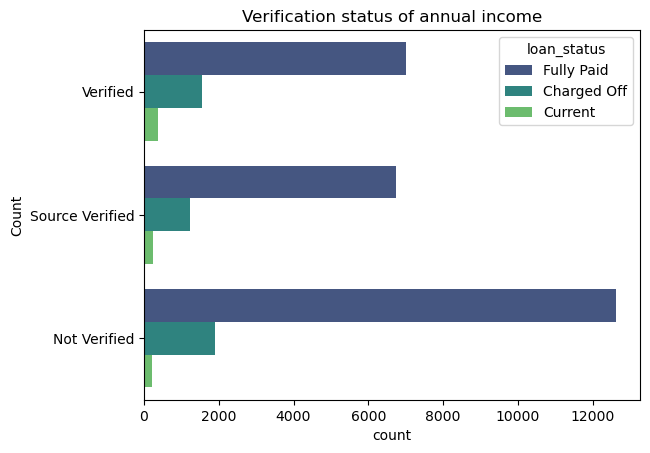

In [218]:
#Univariate analysis on verification status (barplot)
sns.countplot(y="verification_status",data=loan_df_no_outlier,hue='loan_status',palette='viridis')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Verification status of annual income')
plt.show()

#### Observation  
Most of the acoounts are not verified when granting a loan.
Looking at 'Charged off' status bar between 'Verified' and 'Source verfied', it can be derived that 'source verified' have less number of defaults as compared to 'verified'. So it is better that lenders source verfiy the accounts.

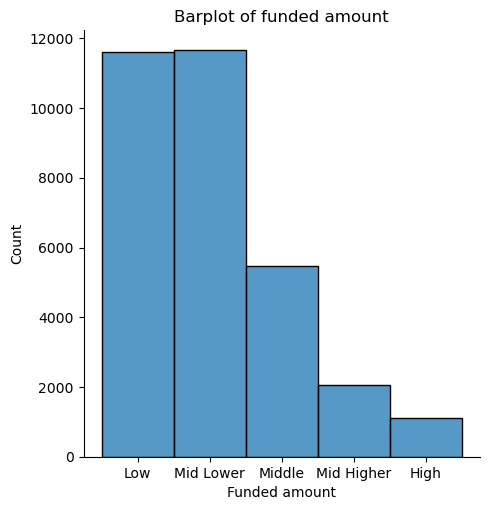

In [170]:
# Univariate analysis on funded amount using bucketing. Here we have selected 5 buckets from Low to high.
fund_bins = pd.cut(loan_df_no_outlier['funded_amnt'], bins=5, labels=['Low', 'Mid Lower', 'Middle', 'Mid Higher', 'High'])
bucket_counts = fund_bins.value_counts().reset_index()
sns.displot(data= fund_bins, bins=5)
plt.title('Barplot of funded amount')
plt.xlabel('Funded amount')
plt.ylabel('Count')
plt.show()

#### Observation
For bar plot above, it can derived that most of the loan amount funded by bank are in Lower and mid lower range .

In [181]:
#Segmentation of columns based on type. Here we are segregating the columns in numerical and categorical columns. 
# Another way of doing it is by directly filtering based on type, but we wanted to select columns specifically.
numerical_columns = loan_df_no_outlier[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',
                    'revol_bal','revol_util','out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                    'recoveries','collection_recovery_fee','last_pymnt_amnt','open_acc','total_acc']] # Numerical columns
categorical_columns = loan_df_no_outlier[['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
                      'addr_state','inq_last_6mths','pub_rec','pub_rec_bankruptcies']] # Categorical columns
extra_columns = loan_df_no_outlier[['issue_d','earliest_cr_line','inq_last_6mths','last_pymnt_d','last_credit_pull_d']] #Date columns

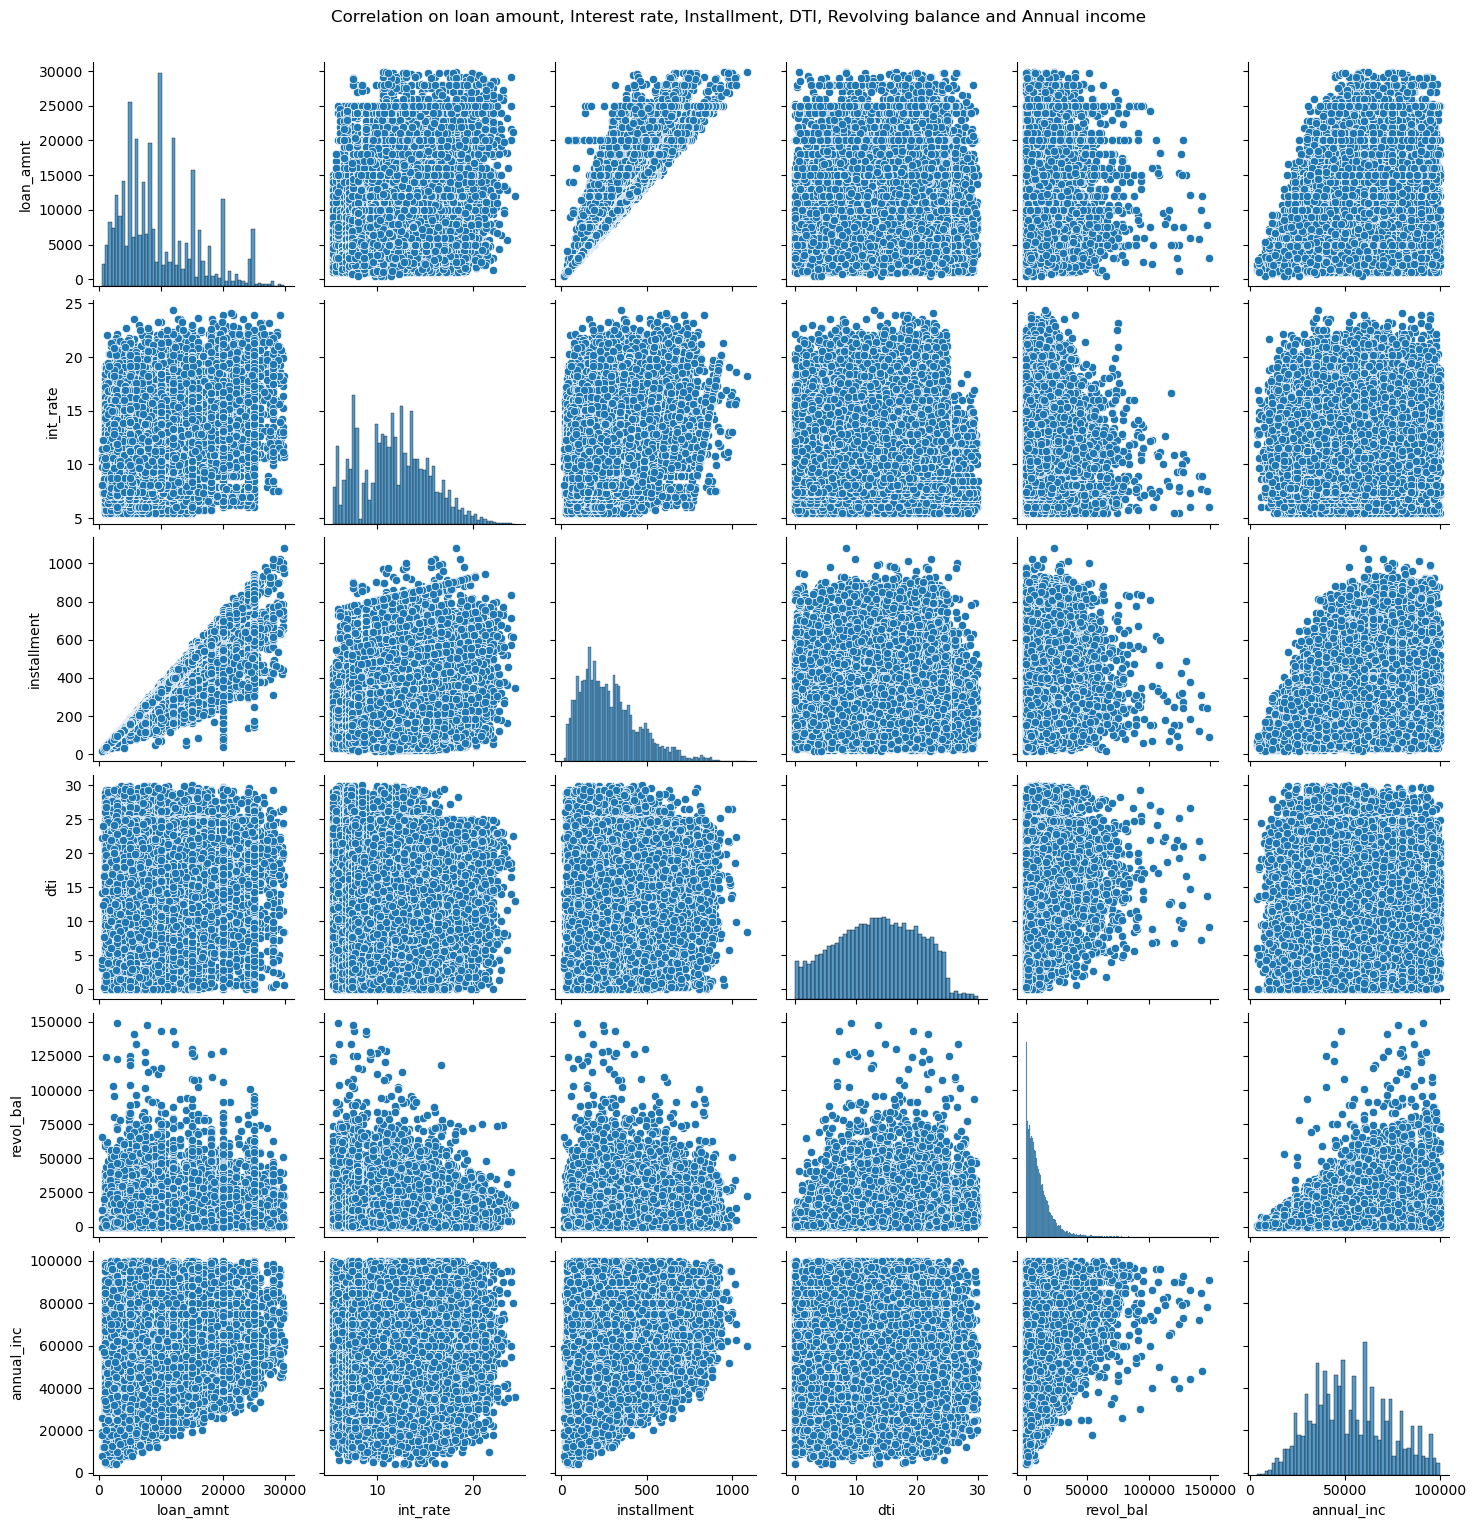

In [179]:
# Scatterplot for various numerical plots to check correlation between various parameters (scatterplot - pairplot)
num_set1 = ['loan_amnt','int_rate','installment', 'dti', 'revol_bal','annual_inc']
sns.pairplot(loan_df_no_outlier[num_set1])
plt.suptitle('Correlation on loan amount, Interest rate, Installment, DTI, Revolving balance and Annual income', y=1.02)
plt.show()

Loan amount vs. Annual income: There appears to be a weak positive correlation between loan amount and annual income. This suggests that individuals with higher annual incomes tend to be approved for larger loan amounts.

dti vs. loan amount: There is no clear correlation between the dti and loan amount.

Annual income vs. revol balance: There appears to be a weak postive correlation between annual income and revolving balance. This suggests that individuals with higher annual incomes tend to have higher revolving balances.

Total Rec Principal vs. Total Int Rate: There appears to be a weak positive correlation between the total principal recovered and the total interest rate. This suggests that loans with higher interest rates might tend to have larger principal amounts.

Total Rec Principal vs. Total Rec Late Fee: There seems to be a slight positive correlation between the total principal recovered and the total late fees. This could indicate that loans with higher principal amounts are more likely to incur late fees.

Total Int Rate vs. Total Rec Late Fee: There is no clear correlation between the total interest rate and the total late fees.

Total Rec Late Fee vs. Recoveries: There seems to be a weak negative correlation between the total late fees and recoveries. This might suggest that loans with higher late fees are less likely to have recoveries.

Total Int Rate vs. Last Pmt Amt: There is no clear correlation between the total interest rate and the last payment amount.

Total Rec Late Fee vs. Last Pmt Amt: There is no clear correlation between the total late fees and the last payment amount.

Recoveries vs. Last Pmt Amt: There is no clear correlation between recoveries and the last payment amount.

Total Rec Principal vs. Last Pmt Amt: There is a weak positive correlation between the total principal recovered and the last payment amount. This suggests that loans with larger last payments might have higher total principal recoveries.

Total Int Rate vs. Last Pmt Amt: There is no clear correlation between the total interest rate and the last payment amount.

Total Rec Late Fee vs. Last Pmt Amt: There is a weak negative correlation between the total late fees and the last payment amount. This might suggest that loans with larger last payments are less likely to have incurred late fees.


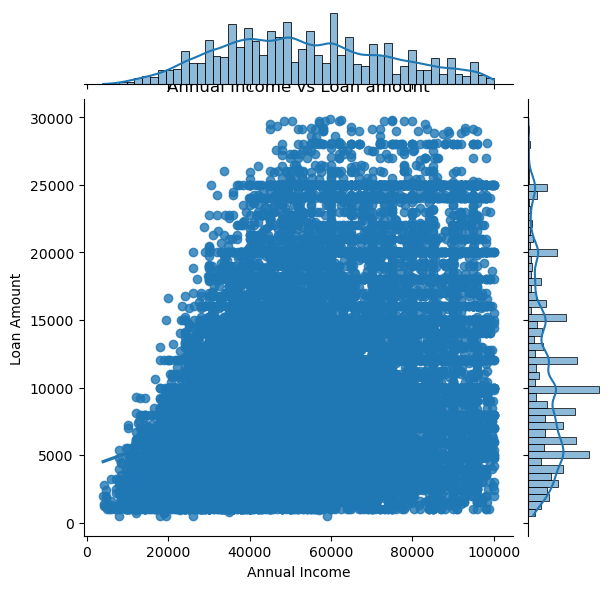

In [192]:
# Bivariate analysis between Annual Income and Loan amount (jointplot)
sns.jointplot(x = loan_df_no_outlier['annual_inc'],y = loan_df_no_outlier['loan_amnt'], kind='reg')
plt.title('Annual Income vs Loan amount')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income') 
plt.show()

OBSERVATION:
1. The positive correlation between annual income and loan amount suggests that lenders may consider an individual's income when determining the loan amount they are eligible for.
2. However, there is also a degree of variability. Some individuals with higher incomes receive lower loan amounts, while others with lower incomes receive higher loan amounts. This implies that the loan will be lended based on other parameters like DTI

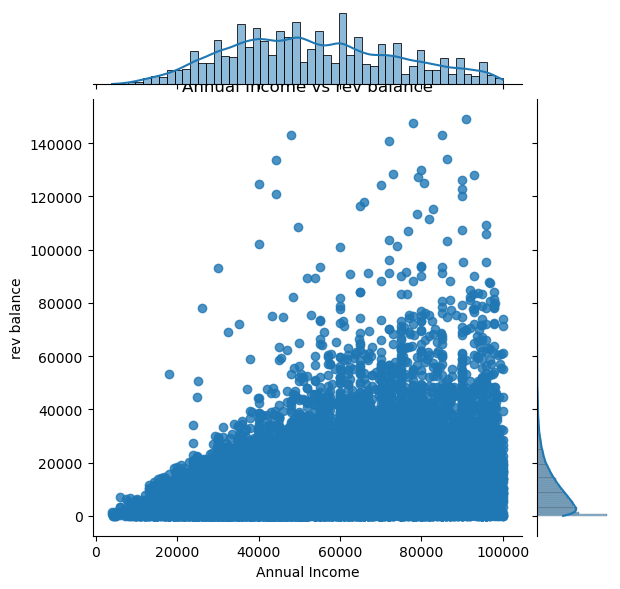

In [39]:
# Bivariate analysis between Annual Income and rev balance (Jointplot)
sns.jointplot(x = loan_df_no_outlier['annual_inc'],y = loan_df_no_outlier['revol_bal'], kind='reg')
plt.title('Annual Income vs rev balance')
plt.ylabel('rev balance')
plt.xlabel('Annual Income') 
plt.show()

#### Observation  
There seems to be a positive correlation between annual income and revolving balance. This suggests that, generally, as annual income increases, so does the revolving balance.

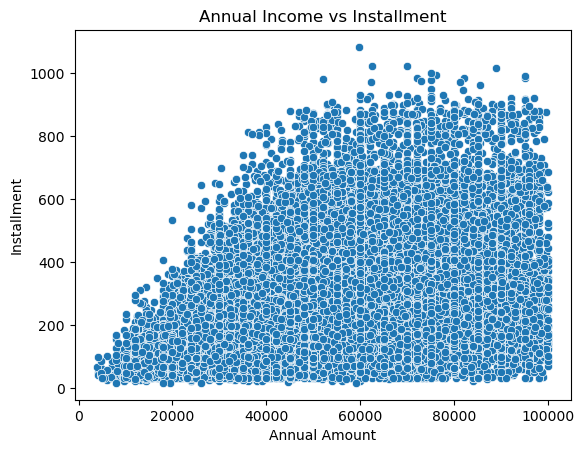

In [194]:
# Bivariate analysis  Annual Income vs installment (Scatterplot)
sns.scatterplot(x = loan_df_no_outlier['annual_inc'],y = loan_df_no_outlier['installment'],palette='viridis')
plt.title('Annual Income vs Installment')
plt.ylabel('Installment')
plt.xlabel('Annual Amount') 
plt.show()

#### Observation   
There appears to be a general positive correlation between annual income and installment amount. This means that as annual income increases, the installment amount tends to increase as well.

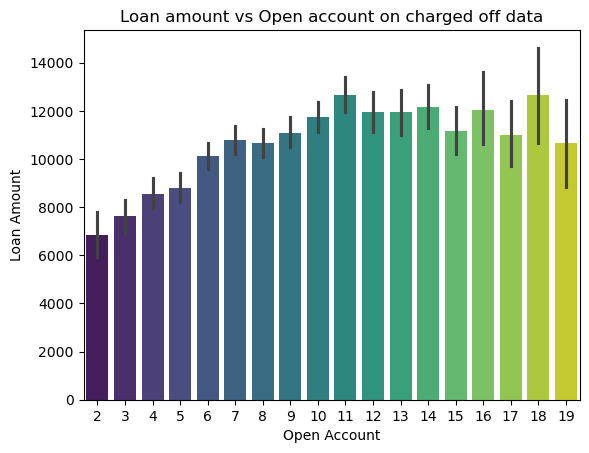

In [41]:
#Analysis between loan amount and open account on charged off data
sns.barplot(x = df_charged_off['open_acc'],y = df_charged_off['loan_amnt'],palette='viridis')
plt.title('Loan amount vs Open account on charged off data')
plt.ylabel('Loan Amount')
plt.xlabel('Open Account') 
plt.show()

#### Observation  
Risk Assessment: The increasing trend in loan amounts with more open accounts might suggest that individuals with a higher number of open accounts are more likely to default on their loans.

In [42]:
# Filtering data to fetch selective columns (purpose and loan amount for bivariate analysis)
Charged_off_purpose = df_charged_off[['purpose','loan_amnt']]
Charge_ann = Charged_off_purpose.groupby(['purpose']).median().reset_index()

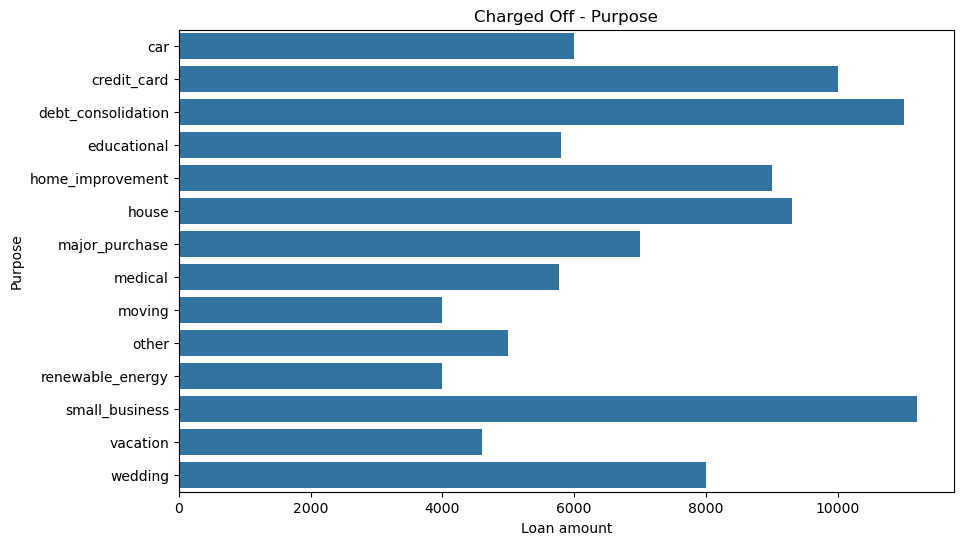

In [43]:
# Bar plot between loan amount and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x = Charge_ann['loan_amnt'], y= Charge_ann['purpose'])
plt.title("Charged Off - Purpose")
plt.xlabel("Loan amount")
plt.ylabel("Purpose")
plt.show()

OBSERVATION  
From above graph, we can derive that, top 3 loan amounts are taken for following purposes ' Debt consolidation', small business', 'credit card'. Lenders might need to exercise more caution when granting loans for these top 3, as they seem to have a higher risk of default.

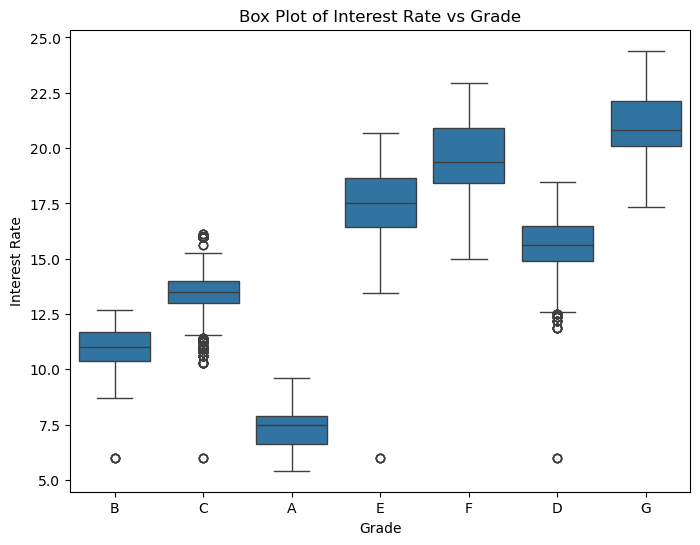

In [197]:
# Bivariate analysis Interest Rate vs Grade (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_df_no_outlier)
plt.title('Box Plot of Interest Rate vs Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

#### Observation
As the loan grade decreases from A to G, the median interest rate generally increases. 
This suggests that borrowers with lower grades are offered higher interest rates.
Customer with high risk profile tend to pay high interest rates.

In [199]:
# Converting emp_length and int_rate columns to numerical type for analysis
loan_df_no_outlier['emp_length'] = loan_df_no_outlier['emp_length'].str.extract('(\d+)').astype('int64')
loan_df_no_outlier['int_rate'] = loan_df_no_outlier['int_rate'].str.strip('%')
loan_df_no_outlier['int_rate'] = loan_df_no_outlier['int_rate'].astype('float64')

AttributeError: Can only use .str accessor with string values!

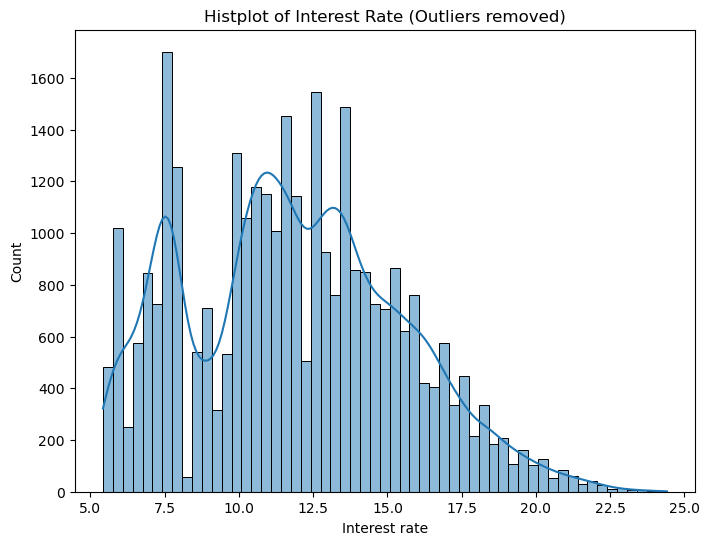

In [86]:
# Univariate analysis for interest rate
plt.figure(figsize=(8, 6))
sns.histplot(x='int_rate', data=loan_df_no_outlier, kde = True)
plt.title('Histplot of Interest Rate (Outliers removed)')
plt.xlabel('Interest rate')
plt.ylabel('Count')
plt.show()

#### Observation 
The distribution of interest rates is right-skewed, indicating that there are a few higher interest rates that pull the mean to the right.
The peak of the distribution is around 10%, suggesting that the majority of loans have interest rates in this range.

In [203]:
#Clustermap to identify the correlation between loan columns. We selected few columns to check degree of correlations between those and plotted (Clustermap)
heat_columns = loan_df_no_outlier[['loan_amnt','total_pymnt','funded_amnt','installment','annual_inc','dti','emp_length','int_rate']]

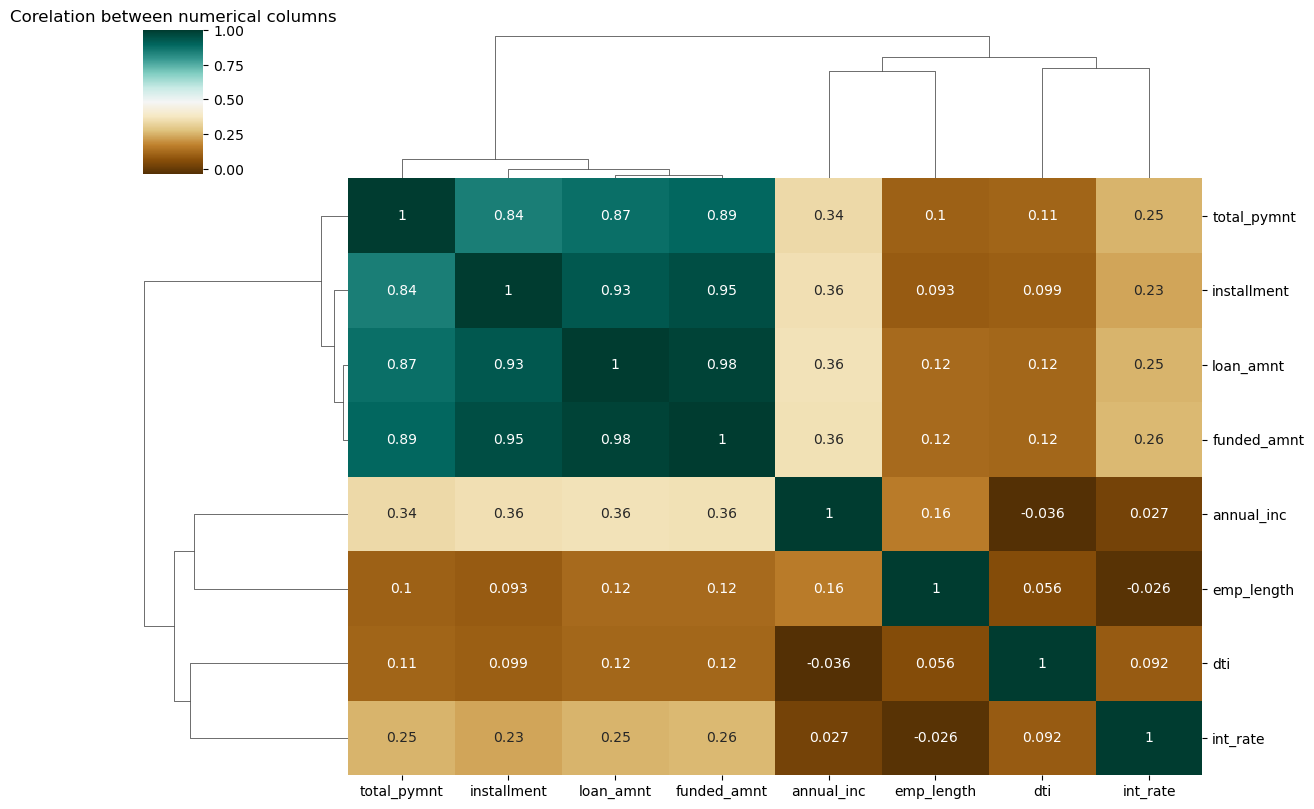

In [205]:
sns.clustermap(heat_columns.corr(),annot=True,figsize=(12, 8),cmap="BrBG")
plt.title('Corelation between numerical columns')
plt.show()

Text(120.72222222222221, 0.5, 'Grade')

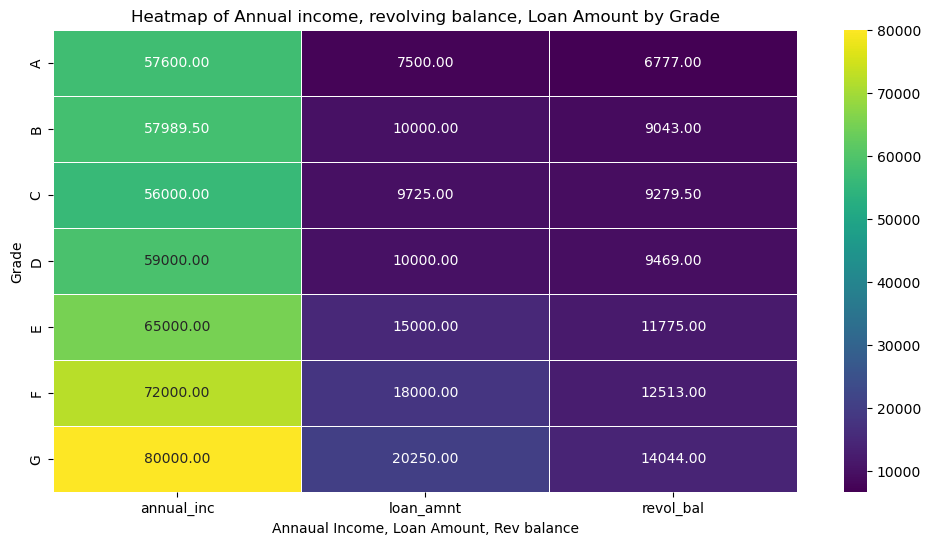

In [48]:
# Pivot table and heat map for revolving balance, annual income and loan amount on total datbase (with outliers)
pivot_table = loan_df.pivot_table(index='grade', values=['annual_inc', 'revol_bal','loan_amnt'], aggfunc='median')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Annual income, revolving balance, Loan Amount by Grade')
plt.xlabel('Annaual Income, Loan Amount, Rev balance')
plt.ylabel('Grade')

#### Observation  
As the loan grade decreases from A to G, the values for annual income, loan amount, and revolving balance generally increase. 
This suggests that borrowers with lower credit scores tend to have higher incomes, take out larger loans, and have higher revolving balances.

# Derived tables

In [207]:
#Extract year from issue_d column and derive a new column for year.
loan_df_no_outlier['issue_d'] = pd.to_datetime(loan_df_no_outlier['issue_d'], format='%b-%y')
loan_df_no_outlier['issue_d_year'] = loan_df_no_outlier['issue_d'].dt.year
loan_df_no_outlier['issue_d_year'].value_counts()

issue_d_year
2011    17040
2010     9473
2009     3882
2008     1294
2007      197
Name: count, dtype: int64

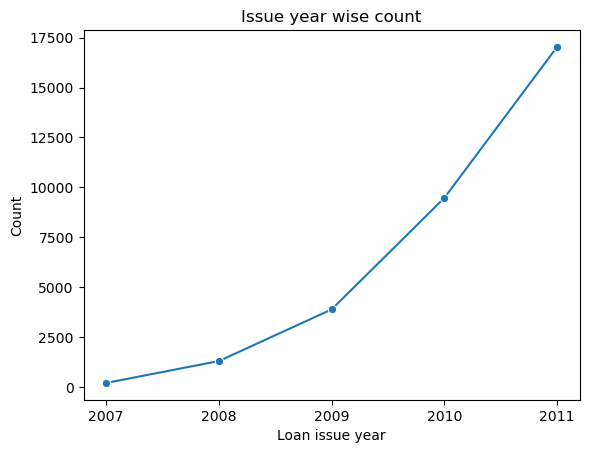

In [51]:
#Univariate analysis on issue date year column (Lineplot)
yearly_counts = loan_df_no_outlier['issue_d_year'].value_counts().sort_index()

# Filter for the years 2007 to 2011
yearly_counts = yearly_counts.loc[2007:2011]

# Create the line plot
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker = 'o')
plt.title("Issue year wise count")
plt.xticks(ticks=range(2007, 2012), labels=[2007, 2008, 2009, 2010, 2011])
plt.xlabel("Loan issue year")
plt.ylabel("Count")
plt.show()

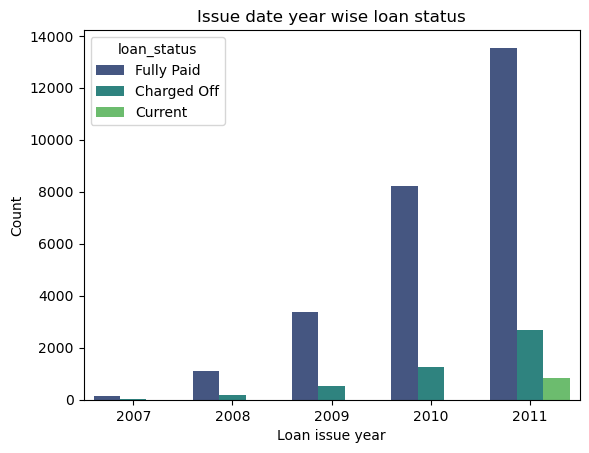

In [52]:
#Bivariate analysis for issue year and loan status (Countplot)
sns.countplot(x = 'issue_d_year',data = loan_df_no_outlier, hue = 'loan_status',palette='viridis' )
plt.title("Issue date year wise loan status")
plt.xlabel("Loan issue year")
plt.ylabel("Count")
plt.show()

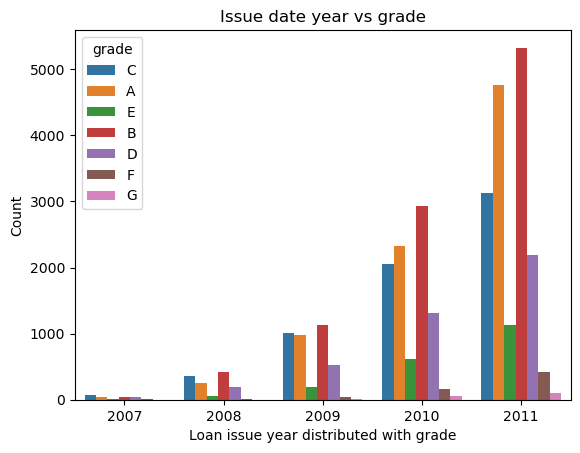

In [53]:
#Bivariate analysis for issue year and grade
sns.countplot(x = 'issue_d_year',data = loan_df_no_outlier, hue = 'grade')
plt.title("Issue date year vs grade")
plt.xlabel("Loan issue year distributed with grade")
plt.ylabel("Count")
plt.show()

#### Observation  
The number of loans issued increased significantly from 2007 to 2011, with a spike in 2011.
In earlier years (2007-2009), most loans were issued with grades A, B, and C.
In 2010 and 2011, there was a noticeable increase in the number of loans issued with lower grades (D, E, F, and G).

In [54]:
loan_df_no_outlier.inq_last_6mths.value_counts()

inq_last_6mths
0    15729
1     8819
2     4570
3     2360
4      232
5       98
6       42
7       26
8       10
Name: count, dtype: int64

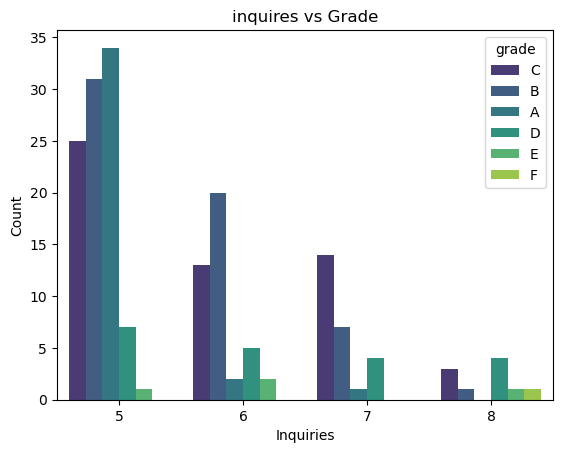

In [209]:
#Bivariate analysis for issue year and loan status, We have selected the higher number of enquiries > 4 for analysis (Countplot)
loan_df_inq = loan_df_no_outlier[loan_df_no_outlier['inq_last_6mths']>4]
sns.countplot(x = 'inq_last_6mths',data = loan_df_inq, hue = 'grade',palette='viridis' )
plt.title("inquires vs Grade")
plt.xlabel("Inquiries")
plt.ylabel("Count")
plt.show()

#### Observation
As the number of loan enquiries increases, the grade or profile ratings decreases,
indicating that when loan enquiries are more (specially more than 5,6), the chances of defaulting increases.

In [234]:
# Derived table.
# We derived table for calculating 'Profit' based on formula Funded amount - (total received principal + total received interest)
Loan_profit = loan_df[['funded_amnt','total_rec_prncp' ,'total_rec_int']]
Loan_profit['Total_Amount_Received'] = Loan_profit['total_rec_prncp'] + Loan_profit ['total_rec_int']
Loan_profit['profit'] = Loan_profit['Total_Amount_Received'] - Loan_profit['funded_amnt']

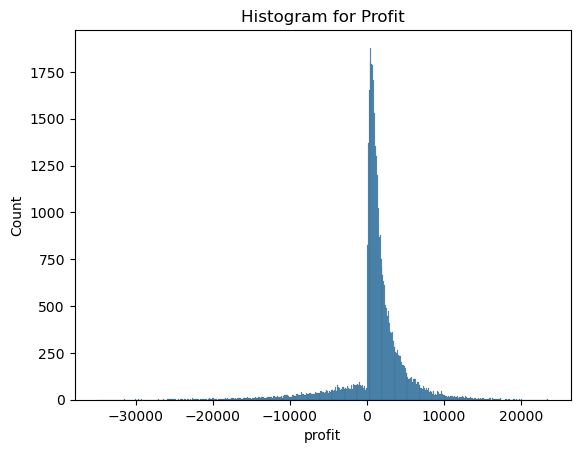

In [236]:
# Plot histogram for profit (Histogram)
sns.histplot(Loan_profit['profit'])
plt.title("Histogram for Profit")
plt.show()

#### Observation
The majority of the data points cluster around a profit value close to 0. This suggests that a large number of transactions or entities have profits near zero.
The presence of negative profits indicates potential risks associated with the business